# Using KNN Algorithm (To Predict if a Person will have Diabetes or Not)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [5]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

<AxesSubplot:>

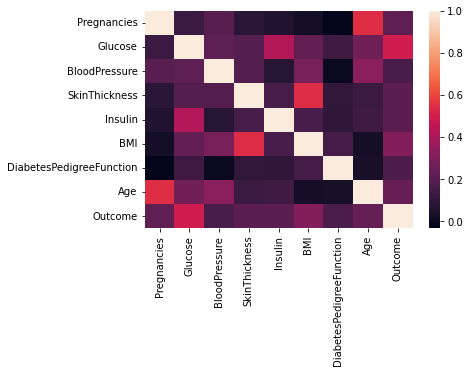

In [6]:
sns.heatmap(data.corr())

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.0,29.0,126.0,35.2,0.692,54
118,4,97.0,60.0,23.0,155.0,28.2,0.443,22
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23
157,1,109.0,56.0,21.0,135.0,25.2,0.833,23
468,8,120.0,72.0,29.0,155.0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
192,7,159.0,66.0,29.0,155.0,30.4,0.383,36
629,4,94.0,65.0,22.0,155.0,24.7,0.148,21
559,11,85.0,74.0,29.0,155.0,30.1,0.300,35


In [9]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [10]:
def Euclidean_distance(point1, point2):
    distance = 0
    for col in X_train.columns:
        distance += np.square(point1[col]-point2[col])
    return np.sqrt(distance)

In [11]:
def KNN(k_value, X_train, X_test, y_train):
    test_labels = []
    for test in range(X_test.shape[0]):
        distance = []
        index = []
        for train in range(X_train.shape[0]):
            distance.append(Euclidean_distance(X_test.iloc[test], X_train.iloc[train]))
            index.append(train)
        Distance_Frame = pd.DataFrame({
            'Distance': distance,
            'Index': index
        })
        Distance_Frame = Distance_Frame.sort_values('Distance')
        zeros_count = 0 
        ones_count = 0
        for i in Distance_Frame['Index'].head(k_value):
            if y_train.iloc[i] == 0:
                zeros_count+=1
            elif y_train.iloc[i] == 1:
                ones_count+=1
        if zeros_count>=ones_count:
            test_labels.append(0)
        else:
            test_labels.append(1)
    return test_labels

In [12]:
for i in range(3, 18, 3):
    Pred_labels = KNN(i, X_train, X_test, y_train)
    print('K:',i, end=", ")
    print(accuracy_score(Pred_labels, y_test))

K: 3, 0.7272727272727273
K: 6, 0.7662337662337663
K: 9, 0.7532467532467533
K: 12, 0.7597402597402597
K: 15, 0.7727272727272727
